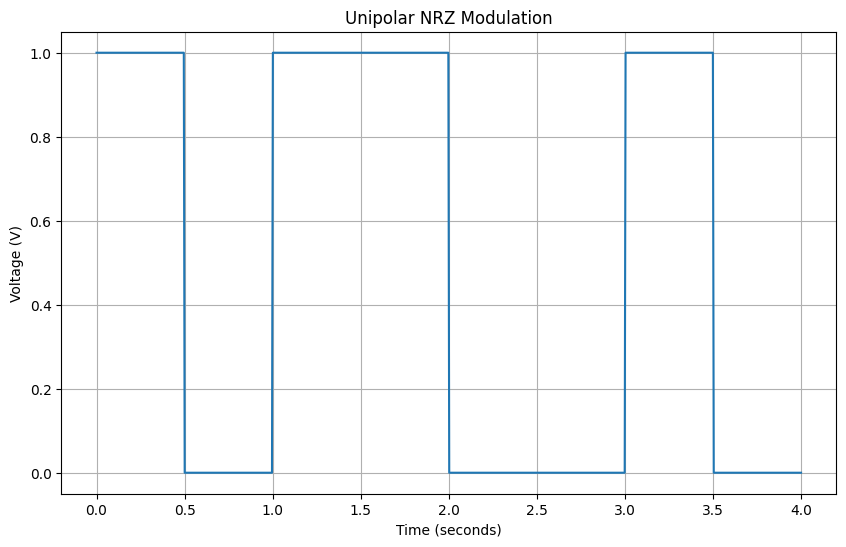

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def unipolar_nrz_modulation(data, bit_duration):

    # Time vector for each bit
    t = np.linspace(0, bit_duration * len(data), len(data) * 100)

    # Create the signal by replicating the bits
    signal = np.repeat(data, 100)  # 100 samples per bit
    signal = signal[:len(t)]  # Adjust signal length to match time array

    # Set the voltage levels (1 for '1' and 0 for '0')
    voltage_signal = signal * 1.0  # '1' maps to +1V, '0' maps to 0V

    return t, voltage_signal

# Example binary data
data = [1, 0, 1, 1, 0, 0, 1, 0]  # Binary sequence
bit_duration = 0.5  # seconds per bit

# Perform modulation
t, signal = unipolar_nrz_modulation(data, bit_duration)

# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Unipolar NRZ Modulated Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')
plt.title('Unipolar NRZ Modulation')
plt.grid(True)
plt.show()

In [5]:
def unipolar_nrz_demodulation(received_signal, bit_duration):


    # Number of samples per bit (assuming same sample rate as modulation)
    samples_per_bit = len(received_signal) // len(data)

    # Initialize the decoded data list
    decoded_data = []

    for i in range(len(data)):
        # Take the average voltage over the bit duration
        bit_signal = received_signal[i * samples_per_bit : (i + 1) * samples_per_bit]
        avg_voltage = np.mean(bit_signal)

        # If average voltage is closer to 1, it's a '1'; if closer to 0, it's a '0'
        if avg_voltage > 0.5:  # Thresholding to decide between '1' and '0'
            decoded_data.append(1)
        else:
            decoded_data.append(0)

    return decoded_data

# Simulate reception of the modulated signal (could be a noisy version in real-world cases)
received_signal = signal  # For simplicity, assume perfect reception (no noise)

# Perform demodulation
decoded_data = unipolar_nrz_demodulation(received_signal, bit_duration)

print("Decoded data:", decoded_data)


Decoded data: [1, 0, 1, 1, 0, 0, 1, 0]
